Welcome to Line Plots. After watching this video, you'll be able to describe a line plot and its function, determine when to use a line plot, and create a line plot from data in the dataset.

### What is a Line Plot?

As its name suggests, a line plot is a plot that displays information as a series of data points connected by straight lines. It is one of the most basic types of charts and is common in many fields, not just data science.

### When to Use a Line Plot?

Line plots are useful for visualizing trends and changes over time, making them a popular choice for time-series data such as changes in stock prices, website traffic, or temperature fluctuations. They can also be used to show relationships between two variables, and multiple data series can be compared on one chart. Line plots are effective in highlighting sudden changes or anomalies in data.

As an example, from our dataset, we can generate a line plot to see the trend of immigrants from Haiti to Canada. Based on this line plot, we observe a spike of immigration from Haiti to Canada in 2010. Further research reveals that the spike was due to the tragic earthquake that occurred in Haiti in 2010.



### Generating a Line Plot

To generate a line plot, as mentioned in an earlier video with Matplotlib, all we have to do is call the `plot` function on the Pandas DataFrame or series containing the data of interest.

Now, let's go over the code. Before that, a quick recap of our dataset: each row represents a country and contains data corresponding to the country's geographical location and development status. Each row also contains numerical figures of annual immigration from that country to Canada (1980-2013).

Let's process the DataFrame so that the country name becomes the index of each row, making querying specific countries easier. Also, let's add an extra column representing the total immigration for each country from 1980-2013.

In [2]:
import pandas as pd

# Sample data for immigration to Canada from multiple countries (1980-2013)
data = {
    'Country': ['Afghanistan', 'Albania', 'Haiti', 'India', 'China'],
    'Continent': ['Asia', 'Europe', 'North America', 'Asia', 'Asia'],
    'Region': ['Southern Asia', 'Southern Europe', 'Caribbean', 'Southern Asia', 'Eastern Asia'],
    'Development Status': ['Developing', 'Developed', 'Developing', 'Developing', 'Developing'],
    '1980': [58639, 15699, 1666, 8880, 5123],
    '1981': [3951, 12829, 2013, 8670, 6682],
    '1982': [7438, 2850, 1829, 8147, 3308],
    '1983': [4323, 3156, 3253, 7338, 1863],
    '1984': [3930, 3187, 3661, 5704, 1527],
    '1985': [1905, 3035, 2167, 4211, 1816],
    '1986': [1682, 2850, 2829, 7150, 1960],
    '1987': [660, 1563, 2399, 10189, 2643],
    '1988': [1172, 1627, 3655, 11522, 2758],
    '1989': [1013, 1127, 4781, 10343, 3392],
    '1990': [1201, 1203, 2726, 13844, 4562],
    '1991': [902, 856, 2639, 16700, 6107],
    '1992': [752, 821, 1631, 15110, 5921],
    '1993': [1062, 456, 1456, 9930, 5376],
    '1994': [1173, 322, 1225, 10015, 4940],
    '1995': [1383, 249, 1524, 7895, 4766],
    '1996': [2140, 307, 2100, 10125, 5070],
    '1997': [1752, 331, 1799, 9076, 5704],
    '1998': [1566, 453, 2101, 10343, 4389],
    '1999': [1012, 505, 2292, 12041, 5804],
    '2000': [1202, 620, 2287, 12718, 6018],
    '2001': [902, 438, 1631, 10009, 6547],
    '2002': [1217, 623, 2433, 12718, 8896],
    '2003': [902, 555, 2174, 13205, 6652],
    '2004': [1201, 852, 1930, 13399, 6772],
    '2005': [1294, 1223, 1652, 13836, 7665],
    '2006': [1399, 856, 1682, 14437, 7461],
    '2007': [1120, 702, 1612, 28261, 7517],
    '2008': [1304, 560, 1598, 29456, 8024],
    '2009': [1288, 716, 1454, 32320, 7123],
    '2010': [1367, 561, 1612, 27173, 7910],
    '2011': [30037, 539, 1652, 28350, 8307],
    '2012': [10262, 620, 1803, 33087, 8422],
    '2013': [4489, 603, 2327, 34129, 9005]
}

# Create a DataFrame from the data
df_canada = pd.DataFrame(data)

# Set 'Country' as the index
df_canada.set_index('Country', inplace=True)

# Convert columns to numeric to avoid TypeError
numeric_columns = df_canada.columns.difference(['Country', 'Continent', 'Region', 'Development Status'])
df_canada[numeric_columns] = df_canada[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Add an extra column for total immigration from 1980-2013
df_canada['Total'] = df_canada[numeric_columns].sum(axis=1)

# Display the DataFrame
df_canada


,Continent,Region,Development Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing,58639,3951,7438,4323,3930,1905,1682,...,1294,1399,1120,1304,1288,1367,30037,10262,4489,155640
Albania,Europe,Southern Europe,Developed,15699,12829,2850,3156,3187,3035,2850,...,1223,856,702,560,716,561,539,620,603,62894
Haiti,North America,Caribbean,Developing,1666,2013,1829,3253,3661,2167,2829,...,1652,1682,1612,1598,1454,1612,1652,1803,2327,73593
India,Asia,Southern Asia,Developing,8880,8670,8147,7338,5704,4211,7150,...,13836,14437,28261,29456,32320,27173,28350,33087,34129,500331
China,Asia,Eastern Asia,Developing,5123,6682,3308,1863,1527,1816,1960,...,7665,7461,7517,8024,7123,7910,8307,8422,9005,190030


Now, let's name our DataFrame `df_canada`. With our data stored in the DataFrame, let's generate the line plot corresponding to immigration from Haiti. First, we import Matplotlib as MPL and its scripting interface as PLT. Then we call the `plot` function on the row corresponding to Haiti, specifying `kind='line'` to generate a line plot. To complete the figure, we give it a title and label its axes. Finally, we call the `show` function to display the figure.

Note that this is the code to generate the line plot using the magic function `%matplotlib` with the inline backend. There you have it—a line plot depicting immigration from Haiti to Canada from 1980-2013.


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

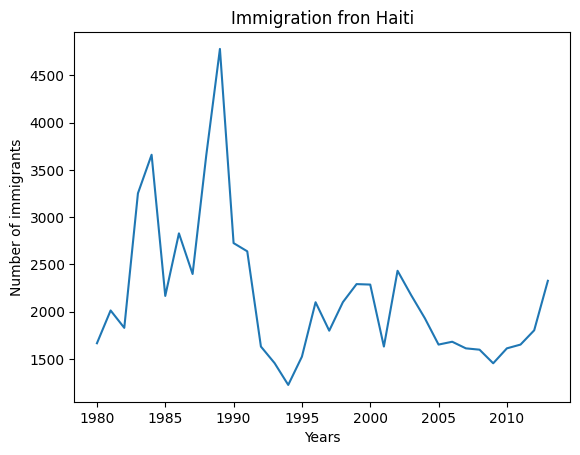

In [4]:
years = list(map(str,range(1980,2014)))

df_canada.loc['Haiti',years].plot(kind='line')
plt.title("Immigration fron Haiti")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

plt.show()